In [227]:
# Starting the Project by importing the librarires
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

# I.Capstone II Porject
Prepared by Jeffrey Aroun bin Omar
<br>
DataScience Job connecter JCDSOL-009

### II.Start - 21st.March.2022
- Data: [TSA_claims_Datasets](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database)
- Title: TSA Claims Database

### II.I Background 
This dataset looks into claims filed against the Transportation Security Administration (TSA), which is responsible for providing security for the traveling public in the United States. The TSA was created in response to the September 11, 2001 terrorist attacks, with the goal of preventing similar attacks from occurring in the future. The agency is mainly responsible for screening passengers and their baggage, as well as overseeing security measures in airports and on airplanes.

We will be exploring and analyzing the dataset using the techniques taught by Purwadhika. Also to provide possible recommendations for better service and performance.

### III.Problem Statement
We will explore:- 
1. What is the most frequent claims lounged against the TSA 
2. Where is the most frequent occurances of incidents that happened
3. 

## 1. Exploring the Data 
1. Importing the data using pandas. 
2. Get the shape of the dataset and identify the number of unique values in it as well as missing values. 
3. See how we can prepare the data for better analysis.

In [281]:
# Importing the data set 

df = pd.read_csv('tsa_claims.csv')

# get the head to see what it looks like 
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_30552\4118624583.py:3: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.00503E+12,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [282]:
# Trying out getting a random sample
df.sample(n=5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
191970,2.01408E+12,23-Jul-14,16-Jul-14,PHX,Phoenix Sky Harbor International,Delta Air Lines,Property Damage,Checked Baggage,Household Items,$0.00,Deny,NaN,NaN
166396,2.01201E+12,7-Dec-11,11/26/2011 0:00,BOS,Boston (Logan) International Airport,American Airlines,Property Damage,Checked Baggage,Clothing,$0.00,Deny,NaN,NaN
65966,2.00506E+12,10-Jun-05,4/16/2005 0:00,ORD,Chicago O'Hare International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$350.00,Denied,$0.00,Deny
75217,2.00511E+12,9-Nov-05,10/7/2005 0:00,TUS,Tucson International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$475.00,Denied,$0.00,Deny
184753,2.01311E+12,7-Oct-13,9/16/2013 11:35,MSY,New Orleans International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204270 entries, 0 to 204269
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [284]:
df.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

### 1.1 Dataset Description
There is 14 columns 204270 rows. 
<br>
We'll proceed to check on the proportion of missing values in the Dataset

### 1.2 Missing & Unique Values 


In [285]:
missing_values = df.isnull()
missing_columns = missing_values.sum()
unique_values = df.describe().loc['unique']
missing_df = pd.DataFrame({'Missing Values Count': missing_columns,
                           "Unique Number of Values": unique_values,
                           '%': (missing_columns / len(df)) * 100})
missing_df['%'] = missing_df['%'].round(2)

missing_df = missing_df.sort_values(by='%', ascending=False)

missing_df



,Missing Values Count,Unique Number of Values,%
Disposition,72911,3,35.69
Close Amount,68955,17162,33.76
Airline Name,34377,318,16.83
Airport Code,8527,465,4.17
Airport Name,8527,485,4.17
Claim Type,7916,11,3.88
Claim Amount,4046,36117,1.98
Item,3969,4704,1.94
Incident Date,2186,26807,1.07
Claim Site,743,6,0.36


###### Comparing missing values and possible unique values the data can hold.

### 1.2.1 General Insight

From the table listed above there is a few columns that are salvageable columns to handle missing values such as:-
1. Disposition
2. Claim Type
3. Claim Site
4. Status
<br>

We can look into the unique values theses columes hold including null values.


In [286]:
ucd = df['Disposition'].value_counts(dropna=False)
ucc =df['Claim Type'].value_counts(dropna=False)
ucs = df['Claim Site'].value_counts(dropna=False)
ucS = df['Status'].value_counts(dropna=False)

In [287]:
# Disposition Column
ucd

NaN                72911
Deny               68382
Approve in Full    35010
Settle             27967
Name: Disposition, dtype: int64

In [288]:
# Claim Type Column
ucc

Passenger Property Loss    117868
Property Damage             75364
NaN                          7916
Personal Injury              1465
Employee Loss (MPCECA)        485
Passenger Theft               465
Motor Vehicle                 369
-                             282
Complaint                      48
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [289]:
# Claim site Column
ucs

Checked Baggage    159753
Checkpoint          40133
Other                2875
NaN                   743
Motor Vehicle         474
-                     276
Bus Station            16
Name: Claim Site, dtype: int64

In [290]:
# Status Column
ucS

Denied                                                                                                                           68339
Approved                                                                                                                         34999
Deny                                                                                                                             28237
Settled                                                                                                                          27958
-                                                                                                                                12752
Approve in Full                                                                                                                  12364
Canceled                                                                                                                          7018
Settle                                                 

#### 1.2.2 Interesting Correlations
- ucS and ucd seem to hold same name values. This could narrow our search and visually varify it on Excel. 
- There seems to be two types of null values which is NaN and -. We should see what kind of values these hold. My assumption is a change in methodology in recording process.
- There is a colma separated value starting with Insufficient. This provides information why there was no dispostion filled in. We can classify it as Unprocurable due to the complaint not fulfilling the formalities of filing a complaint. 


### 1.3.1 Disposition and Status
- We can varify our data using excell filter feature that there was a change in methodolgy and 100% of the time one value correlated to another. 
> Assume it is a spelling mistake and Correct it 
> Have new adjustments reflect disposition. 

### 1.3.2 NaN and - 
- Excel records it as blanks. We will assume that these values are the same as well.

### 1.3.3 colma separated Values
- all came to the same conclusion in excell as well with regard to status holding that value and disposition. But we will run test in pyhton to varify it in one shoot. 

## 2.0 Handling Missing Values
We'll start by Fixing the following:
1. Fix the spelling mistake of Status where all values holding Approved, Denied, Settle, Insufficient. 
2. Have Desposition reflect Disposition. 
3. See if we can add a new category for Null, NaN and - Values.

### 2.1 Spelling Mistake of Status
We will use Pandas for this. 
<br>
<br>
The following code allows us to change values before to new ones.
<br>
<br>
We also changed the title for Insufficient;... to just hold Insufficient. We will assign the disposition as incomplete formalities.
<br>
<br>
We will change Null, NaN and - as Others to make it a category of its own.


In [291]:
# This fixes the spelling mistakes and change Insufficient to a more short hand text for better coding.
df["Status"].replace("Approve in Full", "Approved", inplace=True)
df["Status"].replace("Deny", "Denied", inplace=True)
df["Status"].replace("Settle", "Settled", inplace=True)
df["Status"].replace("Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.", "Insufficient Evidence", inplace=True)


In [292]:
df['Status'].fillna(value='Other', inplace=True)
df['Status'].replace('-', 'Other', inplace=True)

In [293]:
df['Status'].value_counts(dropna=False)

Denied                                               96576
Approved                                             47363
Settled                                              33724
Other                                                12760
Canceled                                              7018
Insufficient Evidence                                 5381
Closed as a contractor claim                          1315
In litigation                                          108
Claim entered                                           14
In review                                                9
Claim has been assigned for further investigation        1
Pending response from claimant                           1
Name: Status, dtype: int64

### 2.2 Have Status Reflect Disposition
1. Denied = Deny
2. Approved = Approved in Full
3. Settled = Settle
4. Other = Non-Pursuable
5. Canceled = Non-Pursuable
6. Insufficient Evidence = Non-Pursuable
7. In litigation = In pursuit
8. In review = In pursuit
9. Claim has been assigned for further investigation = In pursuit
10. Pending response from claimant = In pursuit
11. Closed as a contractor claim = Non-TSA

This allows to hold only 5 categories that we could use for their performance. 

In [294]:
status_to_disposition = {
    'Denied': 'Deny',
    'Approved': 'Approved in Full',
    'Settled': 'Settle',
    'Other': 'Non-Pursuable',
    'Canceled': 'Non-Pursuable',
    'Insufficient Evidence': 'Non-Pursuable',
    'In litigation': 'In pursuit',
    'In review': 'In pursuit',
    'Claim has been assigned for further investigation': 'In pursuit',
    'Pending response from claimant': 'In pursuit',
    'Closed as a contractor claim': 'Non-TSA',
    
}
df['Disposition'] = df['Status'].map(status_to_disposition)

df['Disposition'].fillna(value='Unknown', inplace=True)

In [295]:
df['Disposition'].value_counts(dropna=False)

Deny                96576
Approved in Full    47363
Settle              33724
Non-Pursuable       25159
Non-TSA              1315
In pursuit            119
Unknown                14
Name: Disposition, dtype: int64

In [296]:
# Check our data Status
df.isna().sum()

Claim Number         3
Date Received      266
Incident Date     2186
Airport Code      8527
Airport Name      8527
Airline Name     34377
Claim Type        7916
Claim Site         743
Item              3969
Claim Amount      4046
Status               0
Close Amount     68955
Disposition          0
dtype: int64

### Airport Code and Airport Name Missing values. 
There is still a significant amount of missing values in Airport Code and Airport name. We will just drop these rows due to the fact that we want to analyze the TSA whos main domain of jurisdiction are at airports. 

In [297]:
df['Airport Code'].replace('Missing', np.nan, inplace=True)
df['Airport Name'].replace('Missing', np.nan, inplace=True)

In [298]:
df['Airport Code'].replace('-', np.nan, inplace=True)
df['Airport Name'].replace('-', np.nan, inplace=True)

### Airline Name Missing Values
There is a significant amount of missing values in this column as well we will just drop values where airport Name and code is null. This ensure we have a full random sample. 


In [299]:
df.dropna(subset=['Airport Code', 'Airport Name'], how='all', inplace=True)

In [316]:
df['Airline Name'].replace(np.nan, 'Unknown', inplace=True)

In [317]:
df.isna().sum()

Claim Number         0
Date Received      112
Incident Date      690
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3460
Claim Amount      2288
Status               0
Close Amount     64319
Disposition          0
dtype: int64

In [318]:
df['Claim Site'].value_counts(dropna=False)

Checked Baggage    154107
Checkpoint          38657
Other                1538
Motor Vehicle         432
Bus Station            15
Name: Claim Site, dtype: int64

### Claim Site Missing Values 
There is two type of null values called NaN and -. We will combine them NaN and just drop these as well.

In [319]:
df['Claim Site'].replace('-', np.nan, inplace=True)

In [320]:
df.dropna(subset=['Claim Site'], how='any', inplace=True)

In [321]:
df.isna().sum()

Claim Number         0
Date Received      112
Incident Date      690
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3460
Claim Amount      2288
Status               0
Close Amount     64319
Disposition          0
dtype: int64

### Claim type missing Values
There are a few missing values as well in Claim type we will see what kind of claim type are present in the column.

In [322]:
df["Claim Type"].value_counts(dropna=False)


Passenger Property Loss    114679
Property Damage             71612
Others                       5727
Personal Injury              1414
Employee Loss (MPCECA)        474
Passenger Theft               459
Motor Vehicle                 333
Complaint                      44
Wrongful Death                  4
Compliment                      2
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [323]:
df["Claim Type"].nunique()

11

Based on the reading we will combine the missing values of NaN and - as Others. We will make this a category of its own. There could be a variaty of factors why this field was not filled in but to cross correlate it with items we do not have enough information to determine if the correlation is accurate. For example distinguishing property loss and damage will make our dataset bias. 

In [307]:
df['Claim Type'].replace('-', 'Others', inplace=True)
df['Claim Type'].fillna('Others', inplace=True)

In [324]:
df["Claim Type"].value_counts(dropna=False)

Passenger Property Loss    114679
Property Damage             71612
Others                       5727
Personal Injury              1414
Employee Loss (MPCECA)        474
Passenger Theft               459
Motor Vehicle                 333
Complaint                      44
Wrongful Death                  4
Compliment                      2
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [325]:
df.isna().sum()

Claim Number         0
Date Received      112
Incident Date      690
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3460
Claim Amount      2288
Status               0
Close Amount     64319
Disposition          0
dtype: int64

### Item and Claim amount missing values. 
- _Claim Amount_
<br>
We will replace Claim Amount where Null there are null values we will leave them as is. I have tried to manunipulate it but to no avail.

- _Item_
<br>
We will replace it as undefined if its property damange or loss.
<br> Everything else will be like what we did for column status and disposition

In [326]:
df["Claim Amount"].value_counts(dropna=False)

$0.00         28362
-             12204
$100.00        3564
$50.00         3212
$200.00        3043
              ...  
$1;301.99         1
$1;877.35         1
$397.11           1
$546.96           1
$3;668.84         1
Name: Claim Amount, Length: 35546, dtype: int64

In [327]:
df.isna().sum()

Claim Number         0
Date Received      112
Incident Date      690
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3460
Claim Amount      2288
Status               0
Close Amount     64319
Disposition          0
dtype: int64

In [337]:
# Item to reflect Claim Type. 
df['Claim Type'].value_counts()


Passenger Property Loss    114679
Property Damage             71612
Others                       5727
Personal Injury              1414
Employee Loss (MPCECA)        474
Passenger Theft               459
Motor Vehicle                 333
Complaint                      44
Wrongful Death                  4
Compliment                      2
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [338]:
df["Item"].isna().sum()

74

In [333]:
df.loc[df['Claim Type'].isin(['Property Damage', 'Passenger Property Loss']) & df['Item'].isna(), 'Item'] = 'Not Specified'
df.loc[df['Claim Type'].isin(['Personal Injury']) & df['Item'].isna(), 'Item'] = 'Physical Injury'
df.loc[df['Claim Type'].isin(['Others']) & df['Item'].isna(), 'Item'] = 'Not Specified'
df.loc[df['Claim Type'].isin(['Passenger Theft']) & df['Item'].isna(), 'Item'] = 'Not Defined'
df.loc[df['Claim Type'].isin(['Employee Loss (MPCECA)']) & df['Item'].isna(), 'Item'] = 'Agent Claim'



In [334]:
df['Item'].isna().sum()

74

### Finally we'll just drop Null values for date Received. 

In [351]:
df.dropna(subset=["Date Received"], how="any", inplace=True)


In [352]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date      687
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item                74
Claim Amount      2282
Status               0
Close Amount     64311
Disposition          0
dtype: int64

## 3.0 Data Exploration.
After eliminating Null values where applicable we can now investigate and gather some insight for the TSA. 
<br>
<br>
We will first discuss the data items already have a before and after


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194637 entries, 0 to 204212
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   194637 non-null  object
 1   Date Received  194637 non-null  object
 2   Incident Date  193950 non-null  object
 3   Airport Code   194637 non-null  object
 4   Airport Name   194637 non-null  object
 5   Airline Name   194637 non-null  object
 6   Claim Type     194637 non-null  object
 7   Claim Site     194637 non-null  object
 8   Item           194563 non-null  object
 9   Claim Amount   192355 non-null  object
 10  Status         194637 non-null  object
 11  Close Amount   130326 non-null  object
 12  Disposition    194637 non-null  object
dtypes: object(13)
memory usage: 20.8+ MB


In [354]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date      687
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item                74
Claim Amount      2282
Status               0
Close Amount     64311
Disposition          0
dtype: int64

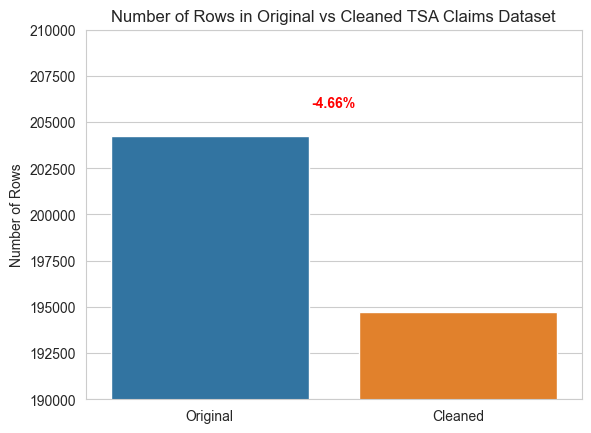

In [355]:
# Using Seaborn and inputing data values
x_labels = ['Original', 'Cleaned']
x_values = [204267, 194749]

#Get the percentage Difference for the before and after
percent = round((x_values[1] - x_values[0]) / x_values[0] * 100, 2)
percentage_text = f'{percent}%'

sns.set_style("whitegrid")
sns.barplot(x=x_labels, y=x_values)
plt.title('Number of Rows in Original vs Cleaned TSA Claims Dataset')
plt.ylabel('Number of Rows')
plt.ylim(190000, 210000)
#Just to position a value of how much the dataset has srunk
plt.text(0.5, 206000, percentage_text, ha='center', va='center', fontweight='bold', color='red') 
plt.show()

In [356]:
display(df.head(), df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approved in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,Unknown,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approved in Full
4,2.00503E+12,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approved in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204208,2015100000000.0,20-Oct-15,29-Sep-15,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,-,-,Other,NaN,Non-Pursuable
204209,2015120000000.0,8-Dec-15,3-Dec-14,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,-,$3;668.84,Settled,NaN,Settle
204210,2015120000000.0,15-Dec-15,8-May-15,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,-,-,Other,NaN,Non-Pursuable
204211,2015070000000.0,16-Jul-15,18-Jul-13,ZZZ,Unspecified Personal Injury,-,Personal Injury,Other,-,-,Other,NaN,Non-Pursuable
204212,2015110000000.0,16-Oct-15,12-Nov-14,ZZZ,Unspecified Personal Injury,-,Personal Injury,Motor Vehicle,-,-,Other,NaN,Non-Pursuable


### Cleaned Data Description
From our new cleaned Dataset we have:
1. Dataset ranges from Jan 2002 until October 2015
2. Dataset has srunk to less than 5% compared to the initial. 
3. Fixed spelling errors
4. only included values where Airport Name is available. 

## 3.1 What claims are reported the most.

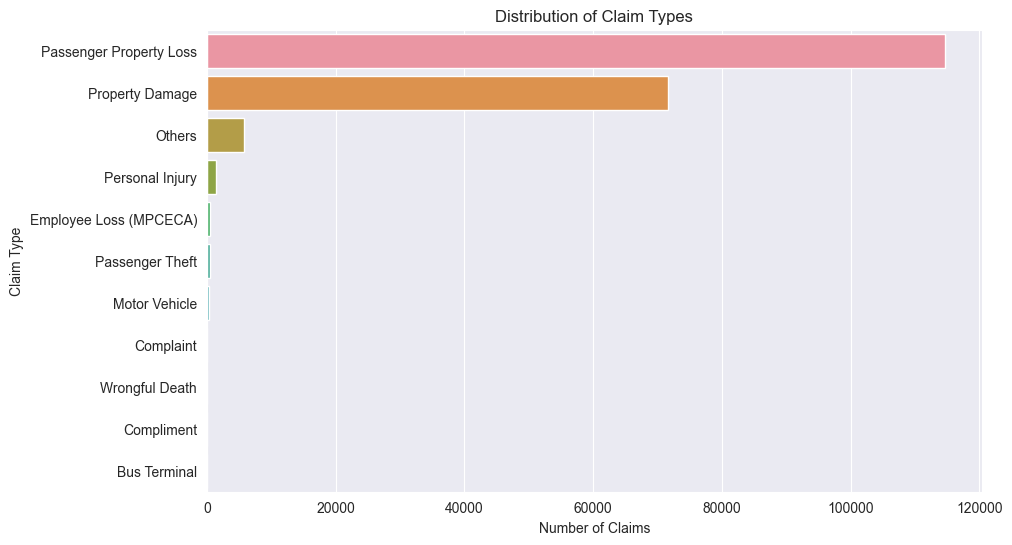

In [357]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(y="Claim Type", data=df, order = df['Claim Type'].value_counts().index)
plt.title('Distribution of Claim Types')
plt.xlabel('Number of Claims')
plt.ylabel('Claim Type')
plt.show()

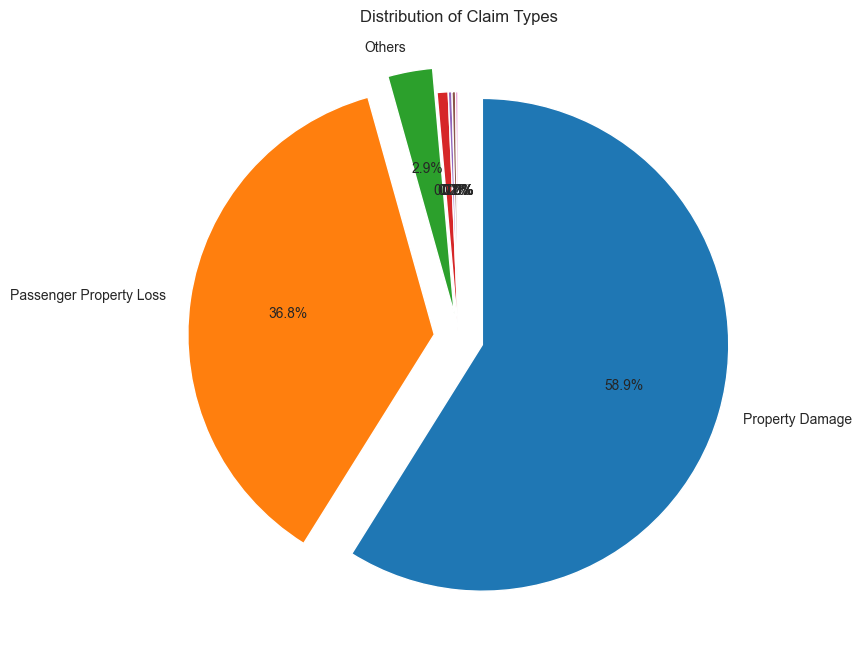

In [358]:
# Create a pie chart of claim types
sns.set_style("darkgrid")
plt.figure(figsize=(8, 8))

# Specify how much to explode each slice of the pie
explode = [0.1 if x in ['Property Damage', 'Passenger Property Loss', 'Others'] else 0 for x in df['Claim Type'].unique()]

# Specify the labels and percentage format for each slice of the pie
labels = [x if x in ['Property Damage', 'Passenger Property Loss', 'Others'] else '' for x in df['Claim Type'].unique()]


# Plot the pie chart
df['Claim Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False, explode=explode, labels=labels)
plt.title('Distribution of Claim Types')
plt.ylabel('')
plt.show()

# Where do these claims happen the most?

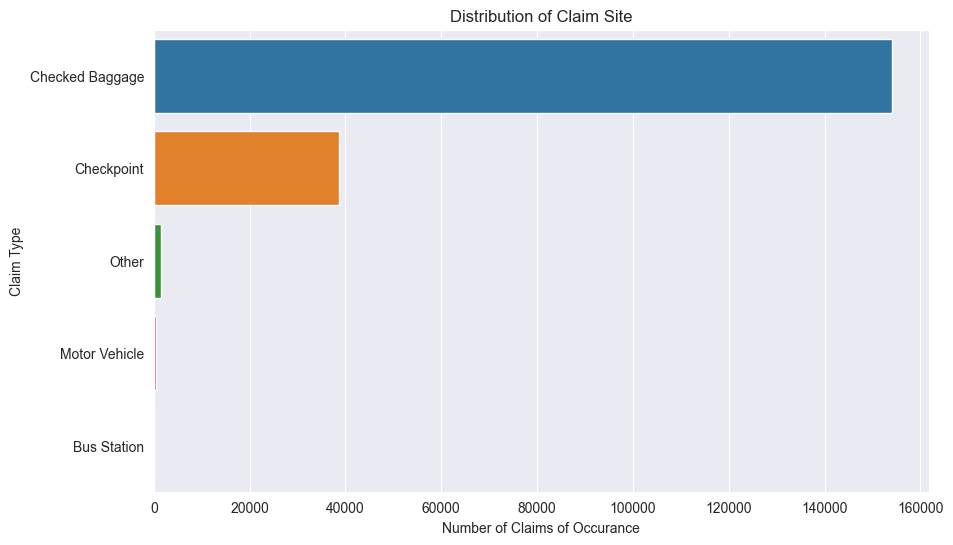

In [359]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(y="Claim Site", data=df, order = df['Claim Site'].value_counts().index)
plt.title('Distribution of Claim Site')
plt.xlabel('Number of Claims of Occurance')
plt.ylabel('Claim Type')
plt.show()

#### Terminology explained 
- Checked Baggage 
<br>
Note: Happens after the passenger checks in with airline and submits their baggage for the airline company to handle to submit to the cargo bay of the airplane.

- Checkpoint
<br>
Note: Happens when the passenger before the passenger boards their plan.


## Has claims been the same through out the year?


In [360]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approved in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,Unknown,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approved in Full
4,2.00503E+12,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approved in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
